<a href="https://colab.research.google.com/github/HollowDena/mahina/blob/clean/dp22055_2md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autors: *Deniss Petrovs, dp22055*
===========================

#1. Moduļu importēšana

In [253]:
# Importē nepieciešamos moduļus
from google.colab import files
import torch
import torch.nn as nn
import torch.nn.functional as F
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [286]:
#Ielādē zip failus
uploaded = files.upload()

In [ ]:
#Piekļūst zip failu saturam
with zipfile.ZipFile("rokas_train.zip", "r") as zip_ref:
    zip_ref.extractall("rokas_train")

with zipfile.ZipFile("rokas_validate.zip", "r") as zip_ref:
    zip_ref.extractall("rokas_validate")


os.listdir("rokas_train")

In [325]:
#Piešķir mapes saturu mainīgajiem
filenames = os.listdir("rokas_train")
filenames2 = os.listdir("rokas_validate")

In [ ]:
filenames

In [ ]:
#Saskaita, cik bilžu ir ar katru pirkstu
count1_train = 0
count2_train = 0
count3_train = 0
count4_train = 0
count5_train = 0

count1_validate = 0
count2_validate = 0
count3_validate = 0
count4_validate = 0
count5_validate = 0

for filename in filenames:
  if(filename[0]=='1'):
    count1_train+=1
  if(filename[0]=='2'):
    count2_train+=1
  if(filename[0]=='3'):
    count3_train+=1
  if(filename[0]=='4'):
    count4_train+=1
  if(filename[0]=='5'):
    count5_train+=1

for filename in filenames2:
  if(filename[0]=='1'):
    count1_validate+=1
  if(filename[0]=='2'):
    count2_validate+=1
  if(filename[0]=='3'):
    count3_validate+=1
  if(filename[0]=='4'):
    count4_validate+=1
  if(filename[0]=='5'):
    count5_validate+=1
print(f"Testa datu statistika: ")
print(f"Ir", count1_train, "1-pirkstu bildes")
print(f"Ir", count2_train, "2-pirkstu bildes")
print(f"Ir", count3_train, "3-pirkstu bildes")
print(f"Ir", count4_train, "4-pirkstu bildes")
print(f"Ir", count5_train, "5-pirkstu bildes")

print(f"Validācijas datu statistika: ")
print(f"Ir", count1_validate, "1-pirkstu bildes")
print(f"Ir", count2_validate, "2-pirkstu bildes")
print(f"Ir", count3_validate, "3-pirkstu bildes")
print(f"Ir", count4_validate, "4-pirkstu bildes")
print(f"Ir", count5_validate, "5-pirkstu bildes")

(-0.5, 511.5, 647.5, -0.5)

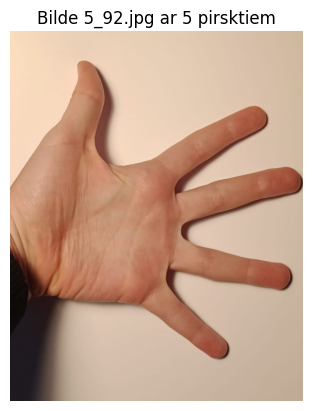

In [316]:
#Izdrukā nejauši izvēlētu bildi no apmācības kopas
random_element = random.choice(filenames)
image = Image.open("rokas_train"''+"/"+random_element)
plt.imshow(image)
plt.title(f"Bilde {random_element} ar {random_element[0]} pirsktiem")
plt.axis('off')

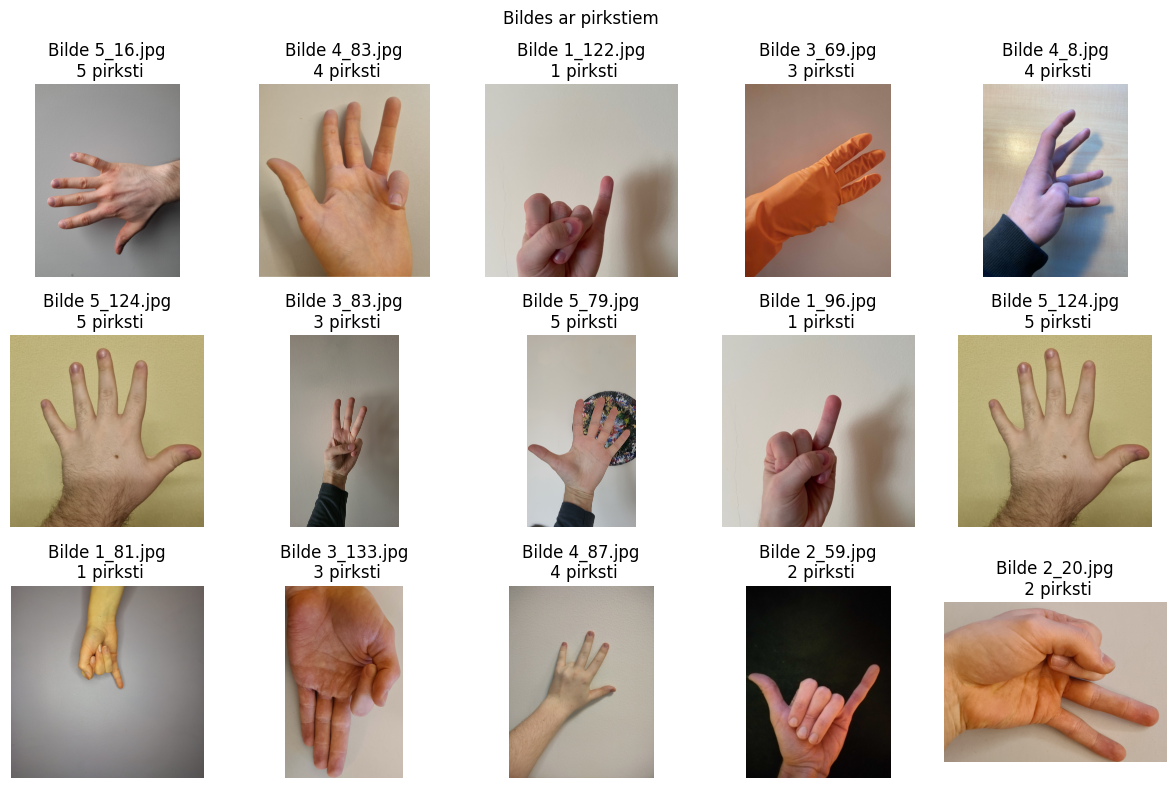

In [287]:
#Izdrukā nejauši izvēlētas bildes no lielās apmācību kopas
rindas = 3
kolonnas = 5
fig, asis = plt.subplots(rindas, kolonnas, figsize=(12,8))
fig.suptitle('Bildes ar pirkstiem')
for i in range(rindas):
    for j in range(kolonnas):
        random_element = random.choice(filenames)
        image = Image.open("rokas_train"+"/"+random_element)
        asis[i, j].imshow(image) # protams var katrā rādīt citu bildi, nevis šo vienīgo
        asis[i, j].set_title(f'Bilde {random_element}\n {random_element[0]} pirksti')
        asis[i, j].axis('off') # nerādam x/y asis kā grafikiem

plt.tight_layout()
plt.show()

In [114]:
#Sadalam apmācības datus pēc pirkstu skaita
files_dict = {str(i): [] for i in range(1, 6)}

for filename in filenames:
    first_char = filename[0]
    if first_char in files_dict:
        files_dict[first_char].append(filename)

files_starting_with_1_train = files_dict['1']
files_starting_with_2_train = files_dict['2']
files_starting_with_3_train = files_dict['3']
files_starting_with_4_train = files_dict['4']
files_starting_with_5_train = files_dict['5']
#Ieliekam sarakstā, lai var izvēlēties kādu konkrētu pirkstu skaitu
files_train_lists = [
    files_starting_with_1_train,
    files_starting_with_2_train,
    files_starting_with_3_train,
    files_starting_with_4_train,
    files_starting_with_5_train
]

In [179]:
#Sadalam validācijas datus pēc pirkstu skaita
files_dict2 = {str(j): [] for j in range(1, 6)}

for filename2 in filenames2:
    first_char = filename2[0]
    if first_char in files_dict:
        files_dict2[first_char].append(filename2)

files_starting_with_1_validate = files_dict2['1']
files_starting_with_2_validate = files_dict2['2']
files_starting_with_3_validate = files_dict2['3']
files_starting_with_4_validate = files_dict2['4']
files_starting_with_5_validate = files_dict2['5']

files_validate_lists = [
     files_starting_with_1_validate,
     files_starting_with_2_validate,
     files_starting_with_3_validate,
     files_starting_with_4_validate,
     files_starting_with_5_validate
]

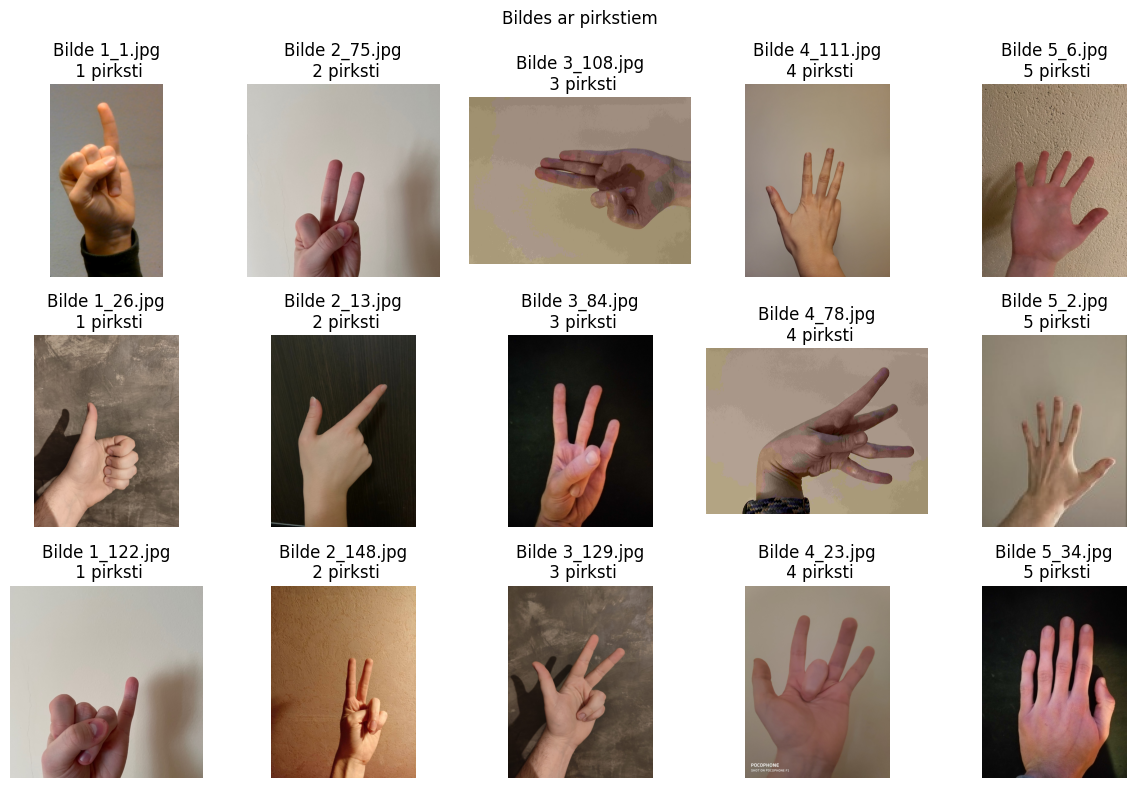

In [317]:
#Izvadam vienu nejauši izvēlētu bildi no katras kopas
rindas = 3
kolonnas = 5
fig, asis = plt.subplots(rindas, kolonnas, figsize=(12,8))
fig.suptitle('Bildes ar pirkstiem')
for i in range(rindas):
    for j in range(kolonnas):
        random_element = random.choice(files_train_lists[j])
        image = Image.open("rokas_train"+"/"+random_element)
        asis[i, j].imshow(image)
        asis[i, j].set_title(f'Bilde {random_element}\n {random_element[0]} pirksti')
        asis[i, j].axis('off')

plt.tight_layout()
plt.show()

In [235]:
# Definē neironu tīklu
torch.manual_seed(69)
class Model(nn.Module):

  def __init__(self, cnt=10, neur1=30, neur2=64, finger=5):
      super().__init__()
      self.lay1 = nn.Linear(cnt, neur1)
      self.lay2 = nn.Linear(neur1, neur2)
      self.izv = nn.Linear(neur2, finger)
  def forward(self, x):
      x = F.relu(self.lay1(x))
      x = F.relu(self.lay2(x))
      x = self.izv(x)
      return x

In [236]:
model = Model()

In [289]:
#Saraksts ar validācijas datu tenzoriem (var noderēt vēlāk, pagaidām nav aktuāli)
# test_list =[]
# for filename in filenames2:
#   X = filename.ljust(10)[:10]
#   X = map(ord, X)
#   X = map(float, X)
#   X = list(X)
#   X = torch.Tensor(X)
#   test_list.append(X)

In [199]:
# X_test = X_test.unsqueeze(1)


In [291]:
# with torch.no_grad():
#   for test in test_list:
#     y_eval = model.forward(test)


In [ ]:
#y_eval

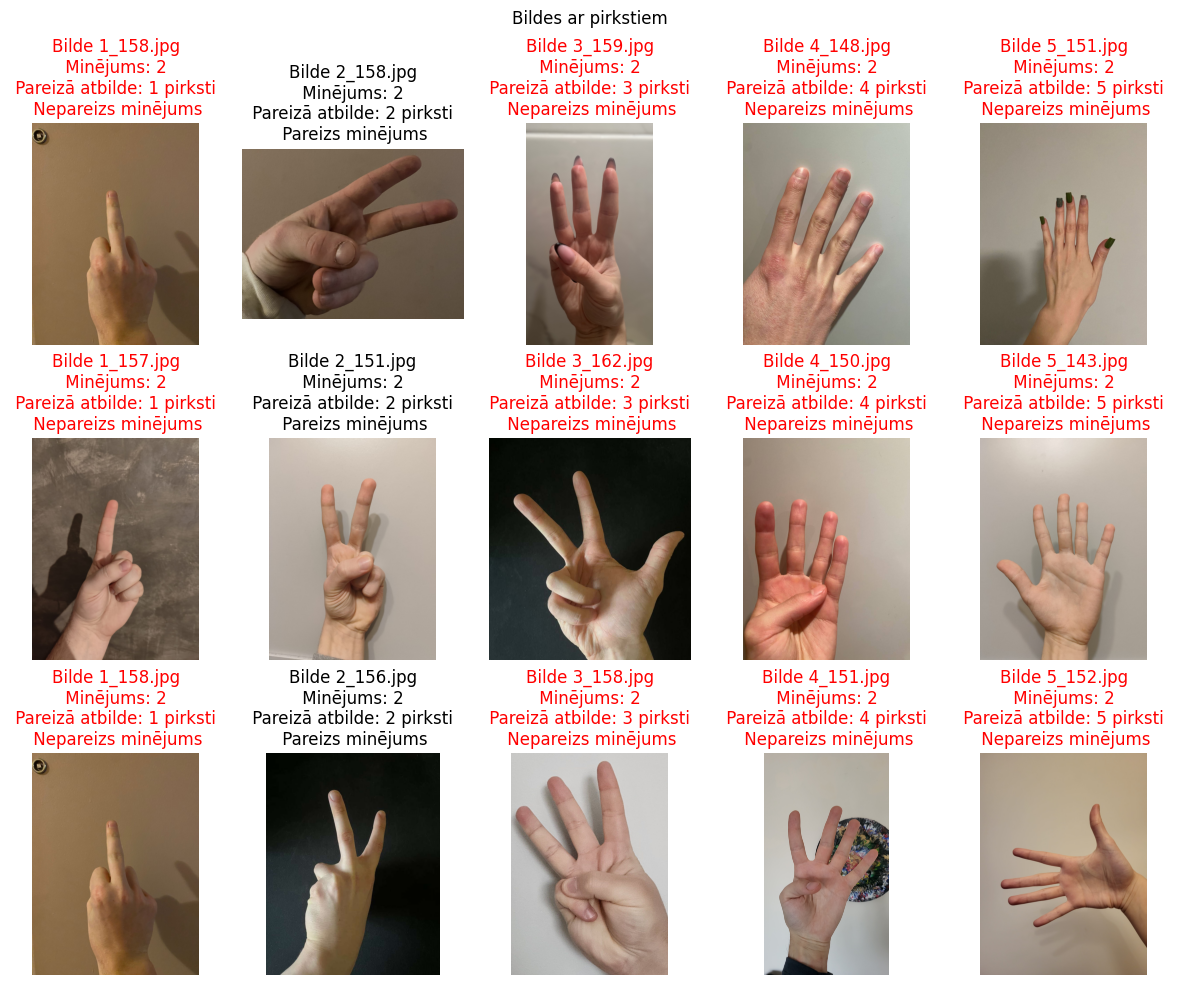

In [320]:
#Izvēlas nejaušu bildi no katras kopas (šeit tiek ņemts no validācijas kopas) un pārbauda, vai modulis ir uzminējis (vēl nav apmācīts)
rindas = 3
kolonnas = 5
neuron_count=10
fig, asis = plt.subplots(rindas, kolonnas, figsize=(12, 10))
fig.suptitle('Bildes ar pirkstiem')
for i in range(rindas):
    for j in range(kolonnas):
        count = files_validate_lists[j]
        finger = random.choice(count)
        X = finger.ljust(neuron_count)[:neuron_count]
        X = map(ord, X)
        X = map(float, X)
        X = list(X)
        X = torch.Tensor(X)
        y_val = model.forward(X)
        image = Image.open("rokas_validate"+"/"+finger)
        asis[i, j].imshow(image)
        z = str(y_val.argmax().item() + 1)
        pareizs = finger[0] == z
        asis[i, j].set_title(f'Bilde {finger}\n Minējums: {z} \n Pareizā atbilde: {finger[0]} pirksti \n { "Pareizs" if pareizs else "Nepareizs" } minējums', color='black' if pareizs
                             else 'red')
        asis[i, j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
filenames